In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/natural_gas_cleaned.csv", parse_dates=["Date"])

In [3]:
df.set_index("Date", inplace=True)

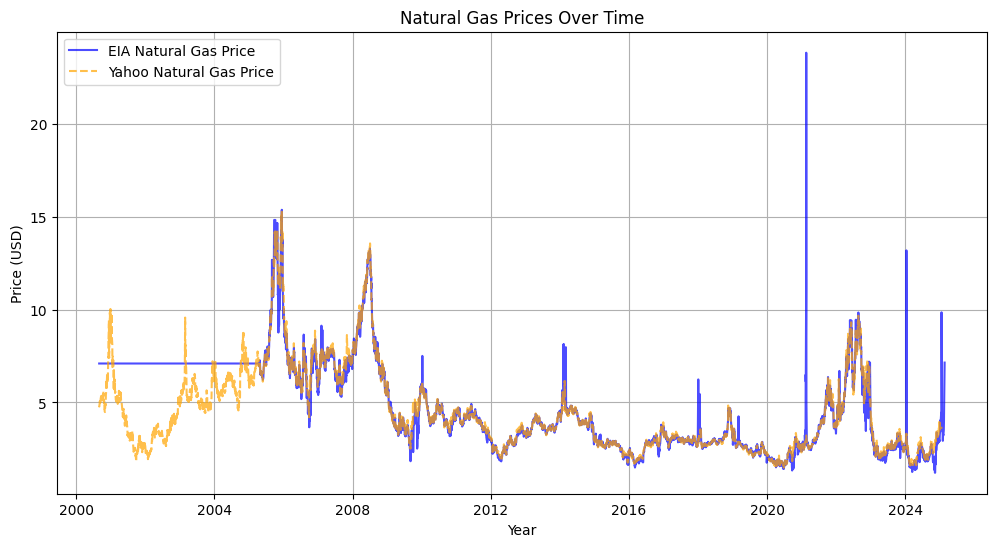

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Price_EIA"], label="EIA Natural Gas Price", color='blue', alpha=0.7)
plt.plot(df.index, df["Price_Yahoo"], label="Yahoo Natural Gas Price", color='orange', linestyle="--", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Natural Gas Prices Over Time")
plt.legend()
plt.grid()
plt.show()

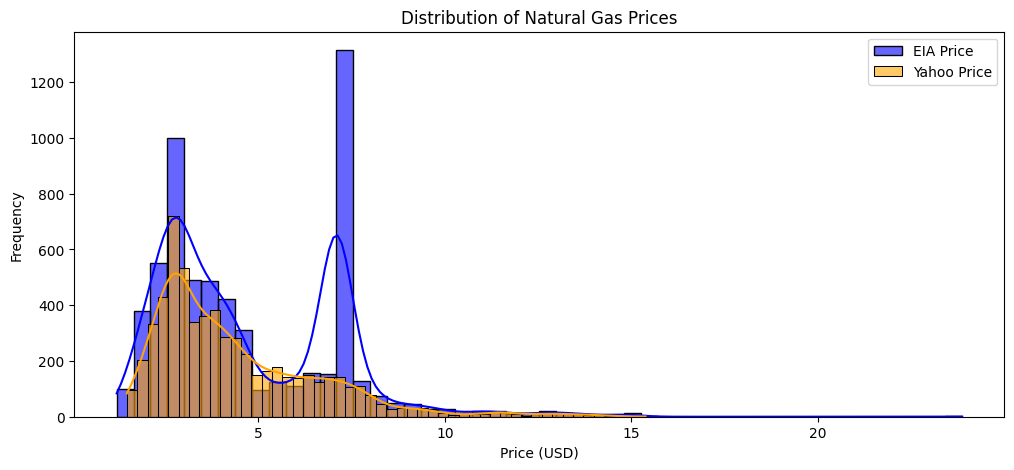

In [5]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Price_EIA"], bins=50, kde=True, color="blue", alpha=0.6, label="EIA Price")
sns.histplot(df["Price_Yahoo"], bins=50, kde=True, color="orange", alpha=0.6, label="Yahoo Price")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Natural Gas Prices")
plt.legend()
plt.show()

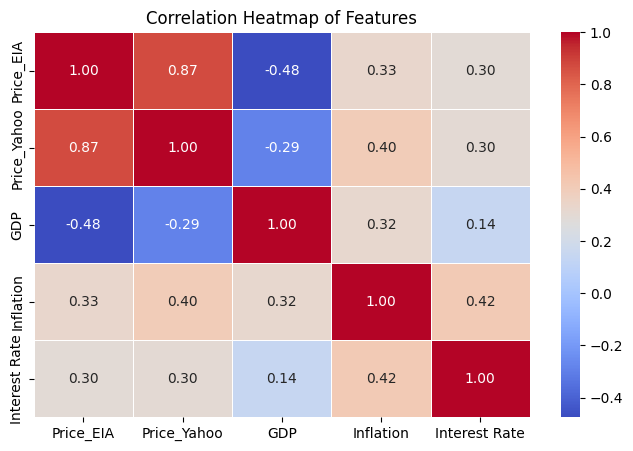

In [6]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [7]:
# Rolling Mean and Volatility Analysis (Moving Average & Std Dev)
window = 30

df["EIA_MA"] = df["Price_EIA"].rolling(window=window).mean()
df["Yahoo_MA"] = df["Price_Yahoo"].rolling(window=window).mean()
df["EIA_Volatility"] = df["Price_EIA"].rolling(window=window).std()
df["Yahoo_Volatility"] = df["Price_Yahoo"].rolling(window=window).std()


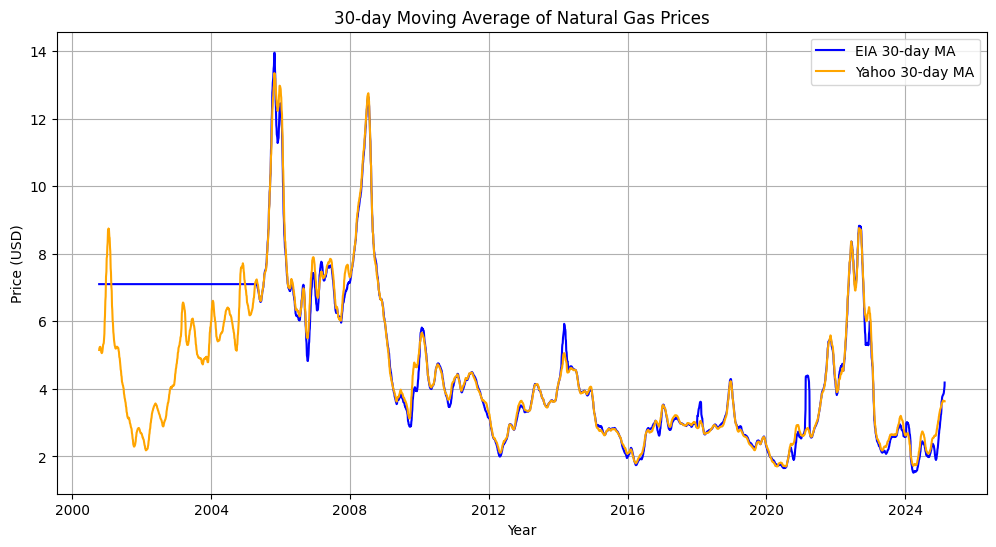

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["EIA_MA"], label="EIA 30-day MA", color='blue')
plt.plot(df.index, df["Yahoo_MA"], label="Yahoo 30-day MA", color='orange')
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("30-day Moving Average of Natural Gas Prices")
plt.legend()
plt.grid()
plt.show()

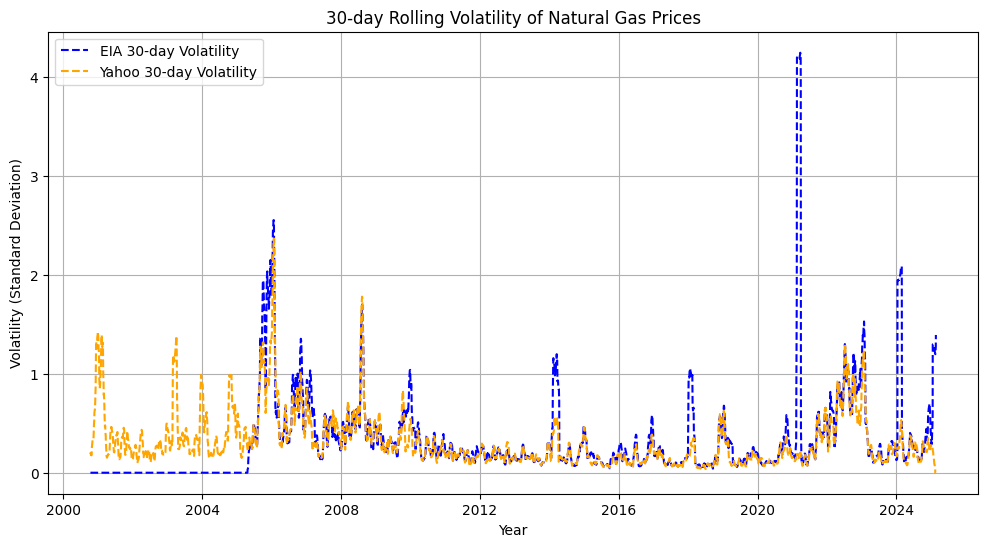

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["EIA_Volatility"], label="EIA 30-day Volatility", color='blue', linestyle="--")
plt.plot(df.index, df["Yahoo_Volatility"], label="Yahoo 30-day Volatility", color='orange', linestyle="--")
plt.xlabel("Year")
plt.ylabel("Volatility (Standard Deviation)")
plt.title("30-day Rolling Volatility of Natural Gas Prices")
plt.legend()
plt.grid()
plt.show()